# ECON 616 Macroeconometrics - HW 5

Professor Ed Herbst <br> Steven Zheng <br> sz293@georgetown.edu <br> December 4, 2017

## Number 1

#### Download data from Gertler and Karadi (2015), drop all observations with NA and where series is uniformly zero. Descriptive statistics and correlation table.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
import math
import statsmodels.api as sm

/Users/stevenzheng/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('factor_data.csv')
data = data.loc[~(data[['mp1_tc','ff4_tc','ed2_tc','ed3_tc','ed4_tc']]==0).all(axis=1)].dropna().reset_index(drop=True)
data.tail()

,year,month,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
262,2012,1,0.000539,0.000000,0.000484,-0.001774,-0.004032
263,2012,2,-0.003871,0.000000,-0.011613,-0.019355,-0.027097
264,2012,3,0.000000,0.000000,0.003065,0.009193,0.012258
265,2012,4,0.000000,0.000000,0.001935,0.005806,0.007742
266,2012,6,0.002754,0.003667,0.007333,0.007333,0.007333


In [3]:
data.describe()

,year,month,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,2000.715356,6.434457,-0.015501,-0.013600,-0.012401,-0.011723,-0.011910
std,6.446532,3.471475,0.058753,0.048675,0.049646,0.051313,0.050781
min,1990.000000,1.000000,-0.422587,-0.290322,-0.255366,-0.275290,-0.251984
25%,1995.000000,3.000000,-0.015782,-0.010984,-0.018226,-0.022903,-0.028387
50%,2001.000000,6.000000,0.000000,-0.001129,-0.001500,-0.001000,-0.003237
75%,2006.000000,9.000000,0.004511,0.003688,0.008479,0.009113,0.009540
max,2012.000000,12.000000,0.145830,0.092193,0.133929,0.161129,0.213387


In [4]:
data[['mp1_tc','ff4_tc','ed2_tc','ed3_tc','ed4_tc']].corr().round(2)

,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
mp1_tc,1.00,0.81,0.74,0.64,0.54
ff4_tc,0.81,1.00,0.81,0.74,0.65
ed2_tc,0.74,0.81,1.00,0.96,0.90
ed3_tc,0.64,0.74,0.96,1.00,0.97
ed4_tc,0.54,0.65,0.90,0.97,1.00


## Number 2

#### We will apply principal components analysis (without using a built-in package). First center and normalize each column so that each column has zero mean and unit variance.

In [91]:
X = data[['mp1_tc','ff4_tc','ed2_tc','ed3_tc','ed4_tc']].copy()
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.columns = ['mp1_tc','ff4_tc','ed2_tc','ed3_tc','ed4_tc']
X.describe().round(3)

,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
count,267.000,267.000,267.000,267.000,267.000
mean,-0.000,0.000,0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002
min,-6.942,-5.696,-4.903,-5.146,-4.737
25%,-0.005,0.054,-0.118,-0.218,-0.325
50%,0.264,0.257,0.220,0.209,0.171
75%,0.341,0.356,0.421,0.407,0.423
max,2.751,2.178,2.953,3.375,4.445


#### And the eigenpairs of $X'X$ are

In [92]:
XTX = np.dot(X.T,X)

eigenvalues, eigenvectors = np.linalg.eig(XTX)
# So apparenlty eigh gives it in a different order than eig!
#eigenvalues = np.flip(eigenvalues,0) #Python gave them in smallest to largest so we flip them
#eigenvectors = np.flip(eigenvectors,1)

print('The eigenvalues are\n %s\nand the eigenvectors are \n %s' % (eigenvalues,eigenvectors))

The eigenvalues are
 [ 1100.53709875   168.87223008    46.53465745    15.69727248     3.35874125]
and the eigenvectors are 
 [[ 0.40066132  0.65349036  0.61717299 -0.17629405 -0.0209464 ]
 [ 0.4339722   0.42992623 -0.77831614 -0.14508527  0.00241074]
 [ 0.48084705 -0.13260004  0.05671399  0.74831789  0.43359797]
 [ 0.47185891 -0.33973923  0.05442712  0.09930073 -0.80566958]
 [ 0.44415528 -0.50508243  0.08451447 -0.61484174  0.40304437]]


 #### The first three principal components explain 82.44% + 12.65% + 3.49% = 98.58% of the variation and follow the levels, steepness and curvature of Litterman and Scheinkman (1991).

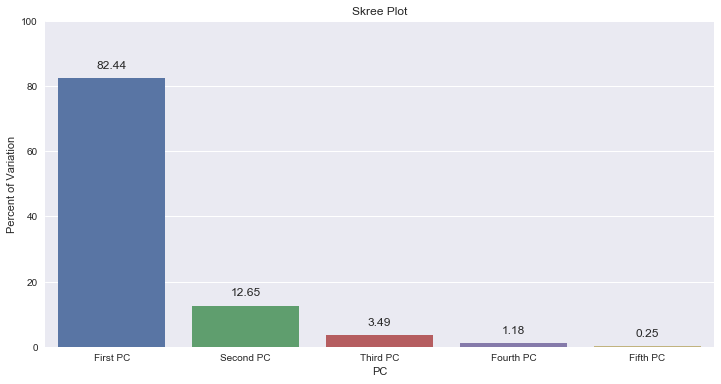

In [33]:
eigenvalues_percent = eigenvalues/sum(eigenvalues)*100

plt.figure(figsize=(12,6))

PC_labels = ['First PC','Second PC','Third PC','Fourth PC','Fifth PC']
ax = sns.barplot(PC_labels,eigenvalues_percent)

for i in range(len(eigenvalues_percent)):
    variation = eigenvalues_percent[i]
    height = ax.patches[i].get_height()
    ax.text(ax.patches[i].get_x()+ax.patches[i].get_width()/2.,
            height+3, 
            '{:1.2f}'.format(eigenvalues_percent[i]),
            ha='center')

plt.xlabel('PC')
plt.ylabel('Percent of Variation')
plt.ylim(0,100)
plt.title('Skree Plot')
plt.show()

In [35]:
eigenvectors = pd.DataFrame(eigenvectors)
#eigenvectors[0] = -1*eigenvectors[0] make it positive for intepretation and visualization

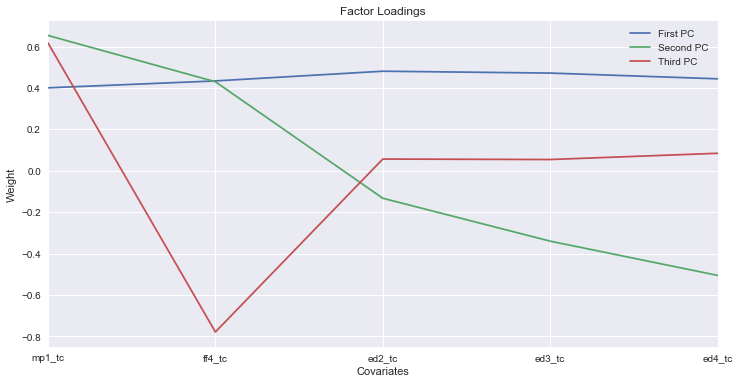

In [36]:
ax = eigenvectors[[0,1,2]].plot(figsize=(12,6))
ax.set_xticks(range(len(X.columns)))
ax.set_xticklabels(X.columns)

lines, labels = ax.get_legend_handles_labels()
labels = ['First PC', 'Second PC', 'Third PC']
ax.legend(lines, labels, loc='best')

plt.title('Factor Loadings')
plt.xlabel('Covariates')
plt.ylabel('Weight')
plt.show()

#### And then plotting the first three principal components over time.

In [37]:
principal_components = pd.DataFrame(np.dot(X,eigenvectors[0]))
principal_components.columns = ['PC 1']
principal_components['PC 2'] = pd.DataFrame(np.dot(X,eigenvectors[1]))
principal_components['PC 3'] = pd.DataFrame(np.dot(X,eigenvectors[2]))
#principal_components['PC 4'] = pd.DataFrame(np.dot(X,eigenvectors[3]))
#principal_components['PC 5'] = pd.DataFrame(np.dot(X,eigenvectors[4]))
principal_components.tail()

,PC 1,PC 2,PC 3
262,0.516792,0.120128,-0.010617
263,0.005194,0.449805,-0.128018
264,0.781944,-0.127873,0.025479
265,0.700208,-0.057381,0.013057
266,0.814640,-0.014749,-0.009583


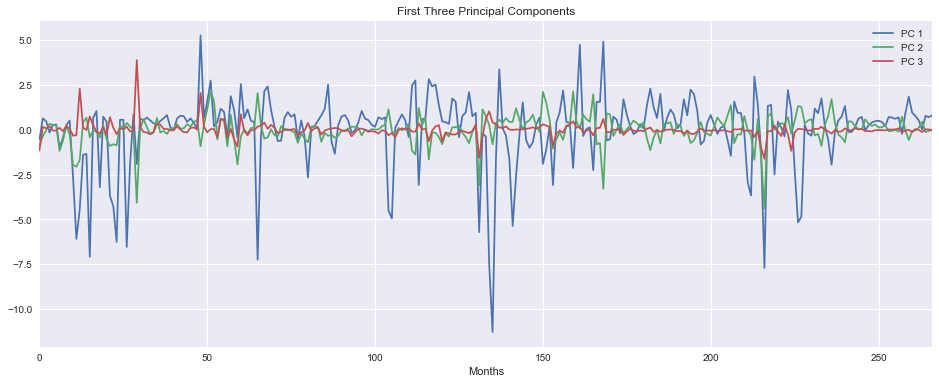

In [38]:
ax = principal_components.plot(figsize=(16,6))
lines, labels = ax.get_legend_handles_labels()
labels = principal_components.columns
ax.legend(lines, labels, loc='best')
plt.title('First Three Principal Components')
plt.xlabel('Months')
plt.show()

#### And the regression of $mp1$ on the first three principal components has great fit!

In [39]:
reg1 = sm.OLS(endog=X['mp1_tc'], exog=principal_components, missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 mp1_tc   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.793e+04
Date:                Mon, 04 Dec 2017   Prob (F-statistic):               0.00
Time:                        10:23:48   Log-Likelihood:                 462.45
No. Observations:                 267   AIC:                            -918.9
Df Residuals:                     264   BIC:                            -908.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC 1           0.4007      0.001    308.729      0.0

## Number 3

#### Now we follow Gurkaynak, Sack and Swanson (2004) and use the first two principal components as the two factors $F_1$ and $F_2$. Let $$F=[F_1 \ F_1]$$ so that $F_1$ and $F_2$ are in $\mathbb{R}^{267}$ and form the columns of $F$ so $F$ is $267\times 2$. 

In [40]:
F = principal_components[['PC 1', 'PC 2']].copy()
F.columns = ['F1','F2']
F.tail()

,F1,F2
262,0.516792,0.120128
263,0.005194,0.449805
264,0.781944,-0.127873
265,0.700208,-0.057381
266,0.814640,-0.014749


#### Then first we normalize each of them to have unit variance.

In [41]:
F = pd.DataFrame(StandardScaler().fit_transform(F))
F.columns = ['F1', 'F2']
F.describe().round(2)

,F1,F2
count,267.00,267.00
mean,0.00,0.00
std,1.00,1.00
min,-5.55,-5.52
25%,-0.16,-0.35
50%,0.22,0.07
75%,0.42,0.47
max,2.59,2.70


#### As mentioned in GSS section 3.2, the two principal components are correlated with $mp_1$, the surpises in the current fed funds target.

In [42]:
pd.concat([X['mp1_tc'], F], axis=1).corr().round(2)

,mp1_tc,F1,F2
mp1_tc,1.00,0.81,0.52
F1,0.81,1.00,0.00
F2,0.52,0.00,1.00


#### So to structurize the two factors, we rotate them by forming $267\times 2$ matrix Z $$ Z=[Z_1 \ Z_2] = FU$$ where $Z_1$ and $Z_2$ correspond to the rotated factors, and where $U$ is a $2\times 2$ solved by:


In [44]:
gamma1 = eigenvectors[0][0]
gamma2 = eigenvectors[1][0]

alpha1 = 1.0*gamma1/math.sqrt(gamma1**2.0 + gamma2**2.0)
alpha2 = 1.0*gamma2/math.sqrt(gamma1**2.0 + gamma2**2.0)

beta1 = 1.0*math.sqrt(gamma2**2.0 / (gamma1**2.0 + gamma2**2.0))
beta2 = -1.0*gamma1*math.sqrt(gamma2**2/(gamma1**2.0 + gamma2**2.0))/gamma2

U = np.array([[alpha1, beta1],[alpha2, beta2]])
print('U = %s'%U)

U = [[ 0.52269005  0.85252279]
 [ 0.85252279 -0.52269005]]


#### We have data $X$ and let $V$ be the matrix where it's two columns are the first two eigenvectors of $X'X$. Then for the rotated factors $Z = (Z_1, Z_2)$ and first two principal components $F=XV$, we have that

$$Z=FV=XVU$$ 

#### and the scaled eigenvectors are $VU$.

In [86]:
VU = pd.DataFrame(np.dot(eigenvectors[[0,1]],U))
Z = pd.DataFrame(np.dot(X,VU))*np.dot(eigenvectors[[0,1]],U)[0,0]
Z.columns=['Z1','Z2']

#### The columns of $U$ have unit length
$$\begin{align*}
\sqrt{\alpha_1 ^2 + \alpha_2^2} = 1
\\\sqrt{\beta_1 ^2 + \beta_2^2} = 1
\end{align*}$$

In [46]:
print(np.linalg.norm(U[:,0]))
print(np.linalg.norm(U[:,1]))

1.0
1.0


#### $Z_1$ and $Z_2$ are orthogonal to each other

$$ \text{E} (Z_1 Z_2) = \alpha_1 \beta_1 + \alpha_2\beta_2=0$$

In [73]:
print((alpha1*beta1 + alpha2*beta2).round(2))

0.0


In [74]:
Z.cov().round(2)

,0,1
0,1.0,0.0
1,0.0,1.0


#### And $Z_2$ does not influence the current policy suprise $mp1$ $$\gamma_2 \alpha_1 - \gamma_1 \alpha_2 =0.$$

In [49]:
print(gamma2*alpha1-gamma1*alpha2)

0.0


#### $Z_1$ and $Z_2$ are normalized so the first factor moves 1-1 with mp1_tc and the second factor does not influence mp1_tc.

In [50]:
Z_reg = Z.copy()
Z_reg['const'] = 1

In [51]:
reg1 = sm.OLS(endog=X['mp1_tc'], exog=Z_reg, missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 mp1_tc   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1803.
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          1.19e-154
Time:                        10:24:52   Log-Likelihood:                -20.405
No. Observations:                 267   AIC:                             46.81
Df Residuals:                     264   BIC:                             57.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Z1             1.0000      0.023     43.254      0.0

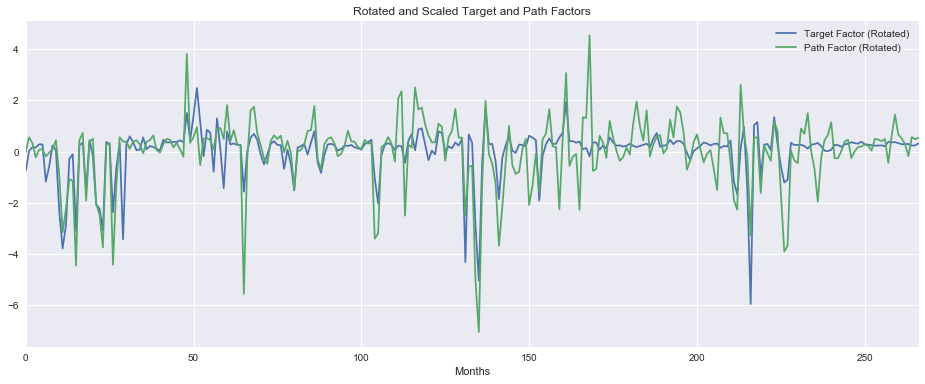

In [52]:
ax = Z.plot(figsize=(16,6))
lines, labels = ax.get_legend_handles_labels()
labels = ['Target Factor (Rotated)', 'Path Factor (Rotated)']
ax.legend(lines, labels, loc='best')
plt.title('Rotated and Scaled Target and Path Factors')
plt.xlabel('Months')
plt.show()

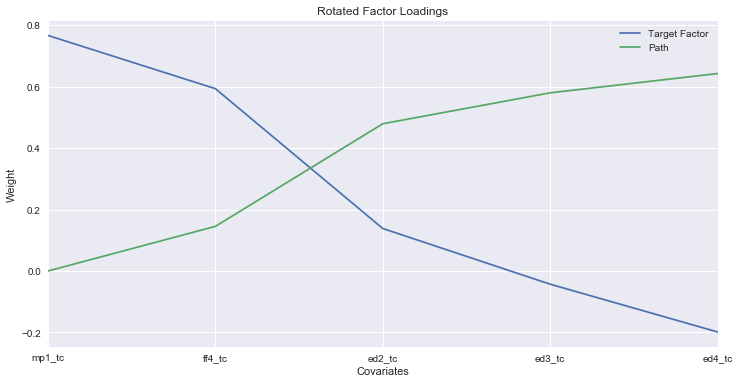

In [53]:
ax = VU.plot(figsize=(12,6))
ax.set_xticks(range(len(X.columns)))
ax.set_xticklabels(X.columns)

lines, labels = ax.get_legend_handles_labels()
labels = ['Target Factor', 'Path']
ax.legend(lines, labels, loc='best')

plt.title('Rotated Factor Loadings')
plt.xlabel('Covariates')
plt.ylabel('Weight')
plt.show()

#### So it looks like the "Target" factor has most weight on mp1, and less and less as the maturies increase, while the "Path" factor has zero weight on mp1 but more and more weight as the maturities increase. From this it may be appropriate to call them "Target" and "Path" factors.

#### The factors are just rotated so they explain the same amount of variance as the principal components in number 2. But comparing the regressions of each asset on just the Target factor and then on the Target and Path factors shows that the R-squared is much higher once we include the Path factor (which aligns with the GSS paper). As increase in R-squared is associated with longer-dated assets (not that longer since the longest is like a year), it may be appropriate to call it the Target and Path factors.

#### Regressions with just Target factor

In [54]:
reg3 = sm.OLS(endog=X['mp1_tc'], exog=Z_reg[['const','Z1']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ff4_tc'], exog=Z_reg[['const','Z1']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed2_tc'], exog=Z_reg[['const','Z1']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed3_tc'], exog=Z_reg[['const','Z1']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed4_tc'], exog=Z_reg[['const','Z1']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 mp1_tc   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     3620.
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          1.58e-156
Time:                        10:27:08   Log-Likelihood:                -20.405
No. Observations:                 267   AIC:                             44.81
Df Residuals:                     265   BIC:                             51.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.654e-17      0.016   -2.9e-15      1.0

#### Regressions with Target and Path factors.

In [55]:
reg3 = sm.OLS(endog=X['mp1_tc'], exog=Z_reg, missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ff4_tc'], exog=Z_reg, missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed2_tc'], exog=Z_reg, missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed3_tc'], exog=Z_reg, missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed4_tc'], exog=Z_reg, missing='drop')
results3 = reg3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 mp1_tc   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1803.
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          1.19e-154
Time:                        10:27:12   Log-Likelihood:                -20.405
No. Observations:                 267   AIC:                             46.81
Df Residuals:                     264   BIC:                             57.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Z1             1.0000      0.023     43.254      0.0

## Number 4

#### Download monetary surprise series by Romer and Romer updated by Yuriy Gorodonichenko.

In [87]:
rr_data = pd.read_csv('rr.csv')
rr_data = rr_data.dropna()

#### Merge the datasets together.

In [88]:
data2=data.copy()
data2['Z1']=Z['Z1']
data2['Z2']=Z['Z2']
merged = pd.merge(data2,rr_data,on=['year','month'])
merged.tail()

,year,month,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc,Z1,Z2,Year,RR
222,2008,8,-0.002596,-0.026129,-0.021774,-0.021774,-0.030484,-0.010363,-0.035603,2008.583333,0.150882
223,2008,9,0.053181,0.056129,0.039274,0.029274,0.015484,0.057620,0.041316,2008.666667,0.025900
224,2008,10,-0.043732,0.047427,0.022177,0.013145,0.006936,-0.003262,0.022687,2008.750000,0.208207
225,2008,11,-0.059003,-0.047417,-0.049678,-0.075645,-0.086935,-0.045785,-0.099977,2008.833333,0.000000
226,2008,12,-0.082668,-0.095489,-0.152258,-0.157419,-0.157419,-0.079011,-0.214082,2008.916667,-0.063294


#### Look at correlations

In [58]:
merged[['Z1','RR']].corr()

,Z1,RR
Z1,1.000000,0.201552
RR,0.201552,1.000000


In [59]:
merged[['Z2','RR']].corr()

,Z2,RR
Z2,1.000000,0.192964
RR,0.192964,1.000000


In [60]:
merged[['mp1_tc','RR']].corr()

,mp1_tc,RR
mp1_tc,1.000000,0.206551
RR,0.206551,1.000000


#### From the correlation tables, it looks like the Target factor is most closely related to the RR shocks (although both are quite weak - maybe I merged the data wrong? But RR shocks are also weakly correlated with mp1 so maybe it's not wrong...) .

#### From my understanding of the paper, GSS essentially outsource pinnning down the shocks / surprise changes to the market. By using high frequency data and tight windows around each Fed event, a no shock is the futures already pricing in FOMC announcements (market conseus agreed with Fed actions), whereas a shock reflects market participants not expecting the FOMC announcements and adjusting their option positions accordingly. 

#### For Romer and Romer, they combine the Greenbook forecasts with narrative methods, by first deriving a series of intended Fed Funds rate changes during FOMC meetings and then regress thsi change on the current Fed Funds rate and Greenbook forecasts to separate the endogenous response of policy to information about the economy from the exogenous shock. 

## Number 5

#### (Assuming by shocks you mean the original Romer and Romer shocks) Estimate (using Stata) the impulse responses using Jorda's local projection method on industrial production, unemployment and inflation for 2 years. It looks like there is a more persistent decine in industrial production and rise in unemployment, both of which return to normal by the end of 4 years (not shown). 

#### Top left is industrial production, top right is unemployment and bottom left is inflation and h is in months.

![my_image](files/3.png)

#### Then following Ramey (2016), we add Fed Funds Rate for 2 year impulse response and see similar results. Notably, a shock that raises the Fed Funds rate returns back by 2 years. In both we see a price puzzle.

#### Top left is Fed Funds rate, top right is industrial production, bottom left is unemployment and bottom right is inflation and h is in months.

![my_image](files/4.png)

#### Ramey's code from http://econweb.ucsd.edu/~vramey/research.html#data